# <span style ='color:royalblue'><center> Aplicación de PCA y resolviendo con K-Means, DBSCAN y HDBSCAN </center></span>

El PCA responde al problema de la dimensionalidad de los datos en donde cuando existe una gran cantidad de variables, se necesita así mismo una cantidad muchísimo mayor de datos para contener el espacio. 

In [1]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import seaborn as sns

In [2]:
os.getcwd()
os.chdir('Data')

In [3]:
df_country = pd.read_csv('Country-data.csv',sep=',')
df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
scaler = StandardScaler()
df_scaled_country = scaler.fit_transform(df_country.drop('country',axis=1))
df_scaled_country

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [5]:
df_scaled_country = pd.DataFrame(df_scaled_country,columns=df_country.drop('country',axis=1).columns)
df_scaled_country.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Método de PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
pca.fit(df_scaled_country)
pca_data_scaled = pca.transform(df_scaled_country)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [8]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Lo anterior simplemente nos indica con una cantidad $i/Componentes$ de índices hay una varianza de tanto en los datos. La ide es hacer una acumulada de las varianzas.

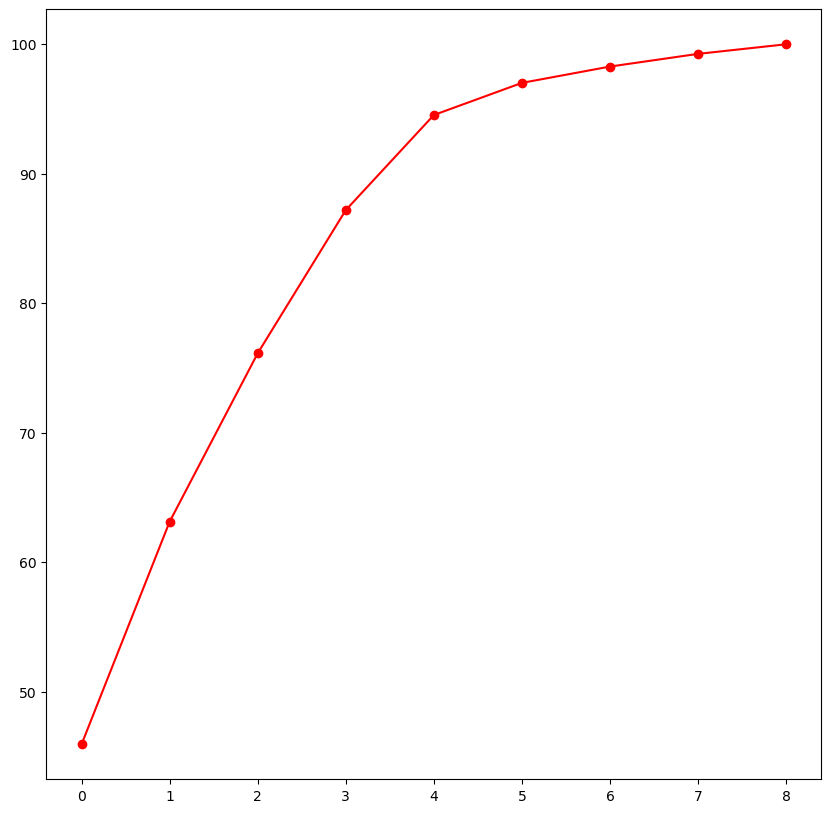

In [9]:
cum_var = np.cumsum(np.round(var,decimals=4)*100) #Para sacar el porcentaje
plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-',marker='o')

En lo anterior podemos ver claramente que hay un entendimiento de casi el 90% del *dataset* explicado únicamente por 4 variables, de esa manera es que podría decirse que esas son las 4 variables más importantes.

In [10]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1,inplace=True)
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## KMeans

### PCA

In [11]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,n_init=10)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

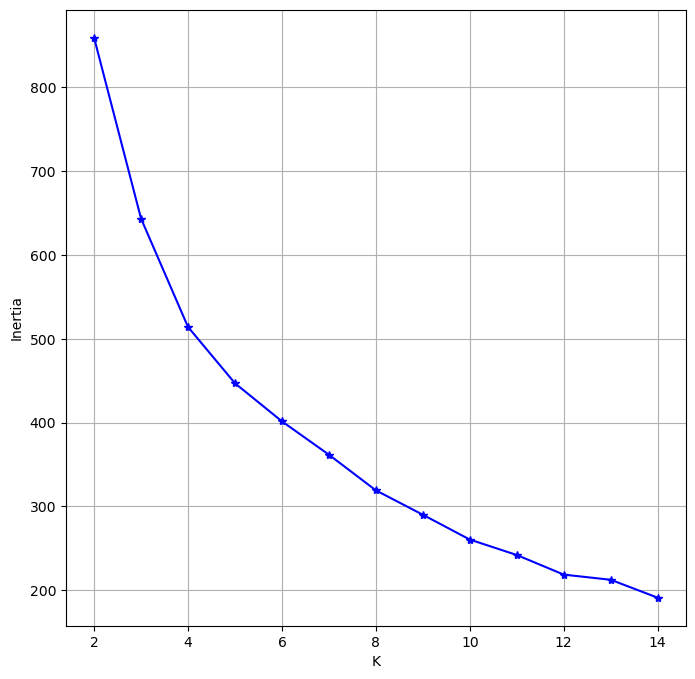

In [12]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances,color='blue',marker='*')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid(axis='both')

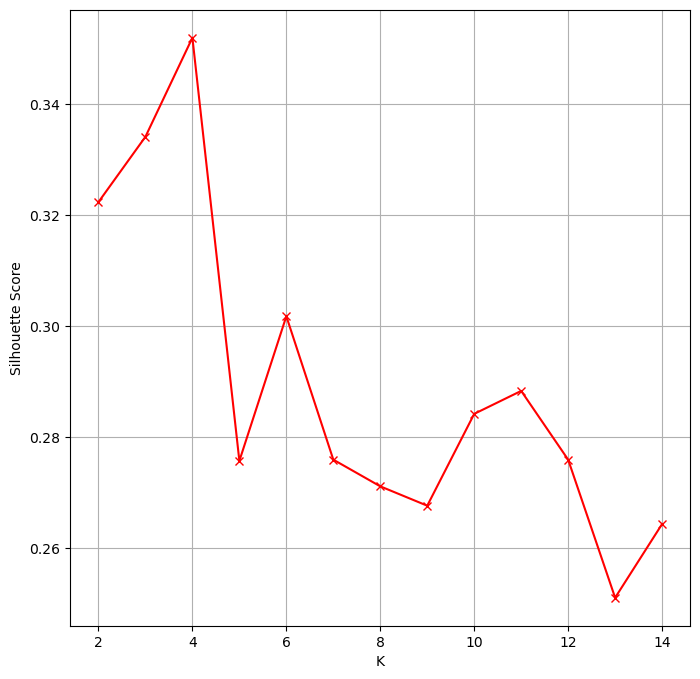

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_scores,color='red',marker='x')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(axis='both')

In [14]:
km = KMeans(n_clusters=4, n_init=10)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y))
df_country['k_means_pca'] = y

0.35221708432935933


### Sin PCA

In [15]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,n_init=10)
    y = km.fit_predict(df_scaled_country)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled_country,y))

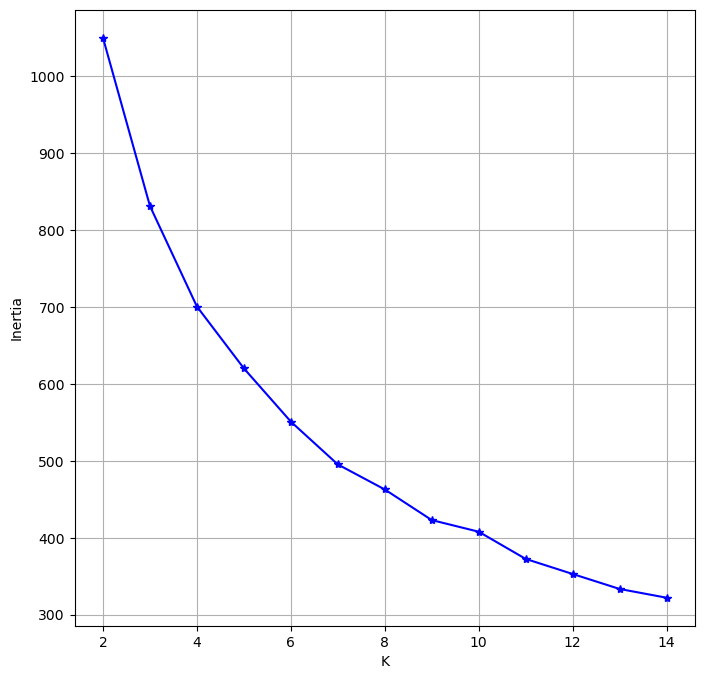

In [16]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances,color='blue',marker='*')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid(axis='both')

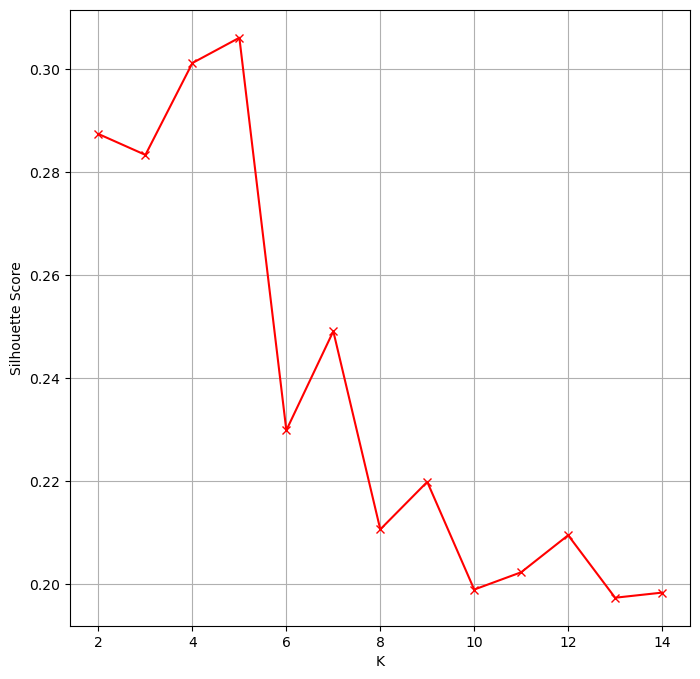

In [17]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_scores,color='red',marker='x')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(axis='both')

In [18]:
km = KMeans(n_clusters=5, n_init=10)
y = km.fit_predict(df_scaled_country)
print(silhouette_score(df_scaled_country,y))
df_country['k_means_sin_pca'] = y

0.30088229124112015


## Hierarchical clustering

### PCA

Text(0, 0.5, 'Euclidean distance')

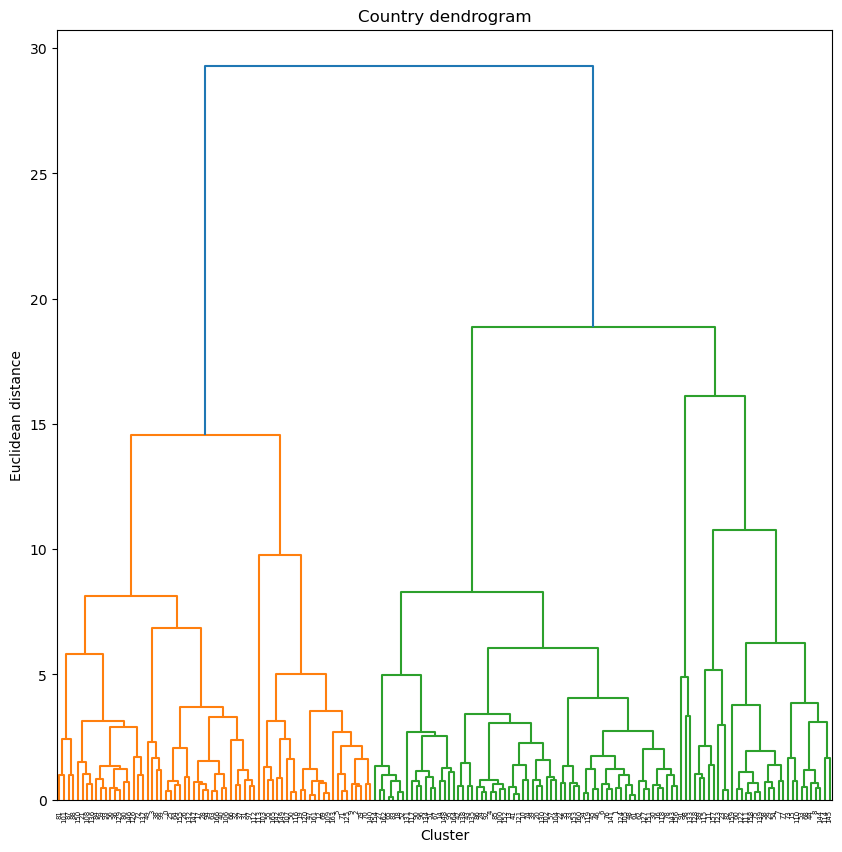

In [19]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard,method='ward'))
plt.title('Country dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')

In [20]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc))
df_country['hc_pca'] = y_hc

0.30701107040805264


C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Sin PCA

Text(0, 0.5, 'Euclidean distance')

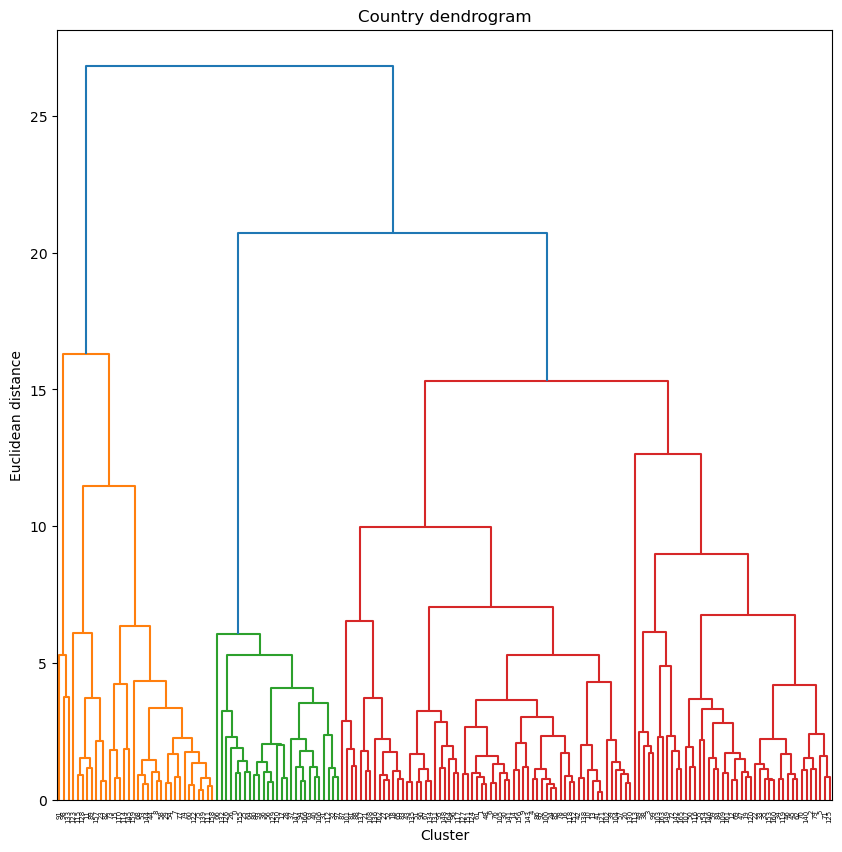

In [21]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_scaled_country,method='ward'))
plt.title('Country dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')

In [22]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_scaled_country)
print(silhouette_score(df_scaled_country,y_hc))
df_country['hc_sin_pca'] = y_hc

0.3153134331018189


C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

### PCA

In [23]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

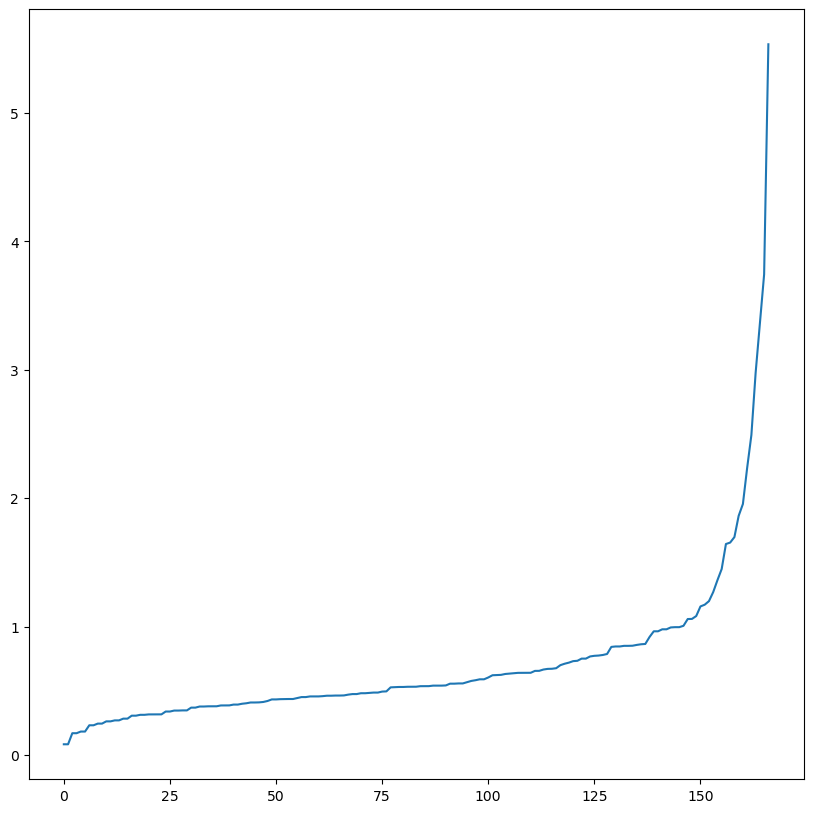

In [24]:
distances = np.sort(distances,axis=0)
distances=distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [25]:
eps_values = np.arange(0.6,2,0.1)
min_samples = np.arange(3,12,1)

In [26]:
from itertools import product
dbscan_params = list(product(eps_values,min_samples))
no_clusters = []
sil_score = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)
    no_clusters.append(len(np.unique(y_dbscan)))

In [27]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params,columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_clusters

In [28]:
pivot_1 = pd.pivot_table(df_param_tunning,values='sil_score',columns='Eps',
                        index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning,values='n_clusters',columns='Eps',
                        index='Min_samples')

<AxesSubplot: xlabel='Eps', ylabel='Min_samples'>

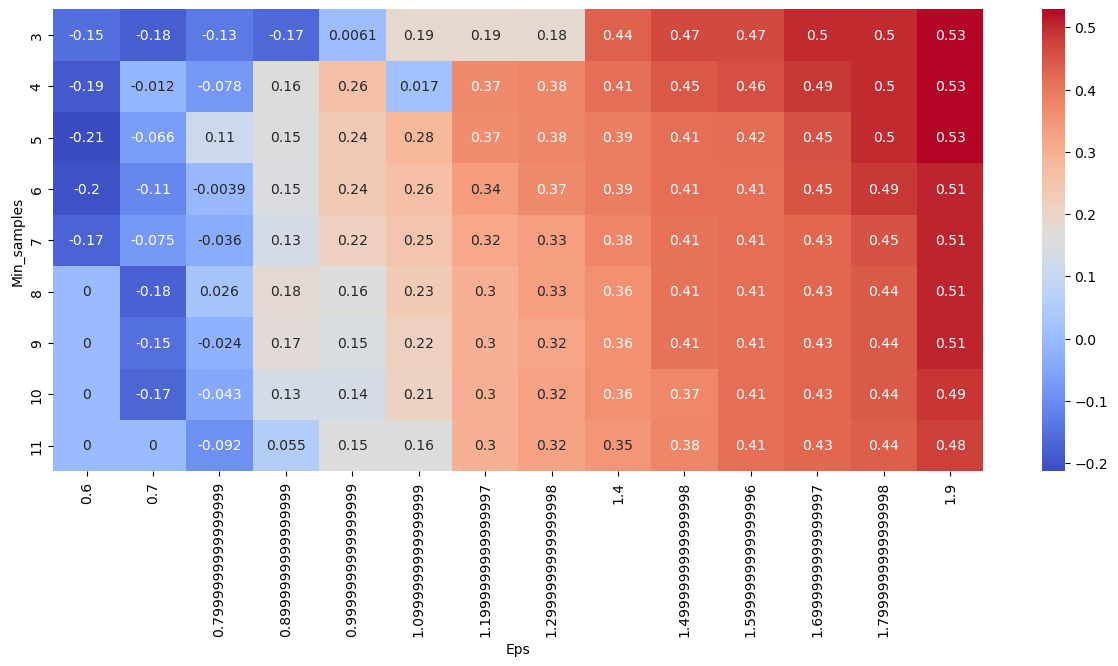

In [29]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
sns.heatmap(data=pivot_1,annot=True,annot_kws={'size':10},cmap='coolwarm',
           ax=ax)

<AxesSubplot: xlabel='Eps', ylabel='Min_samples'>

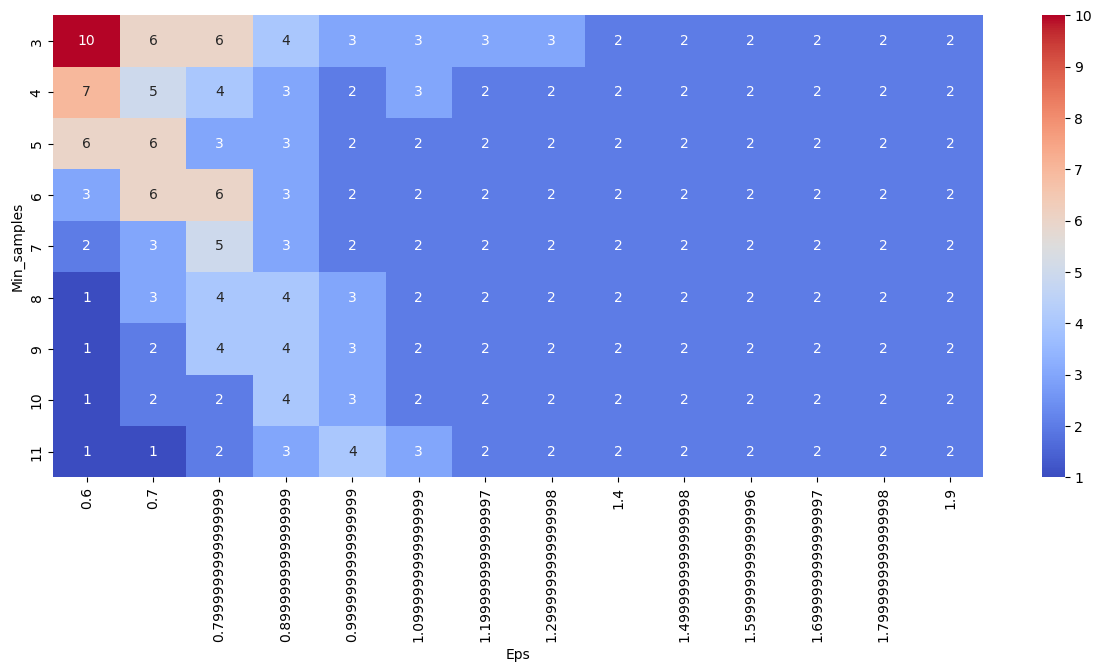

In [30]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
sns.heatmap(data=pivot_2,annot=True,annot_kws={'size':10},cmap='coolwarm',
           ax=ax)

In [31]:
dbscan_train = DBSCAN(eps=1.1,min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan))
df_country['dbscan_pca'] = y_dbscan

0.1861891244286947


### Sin PCA

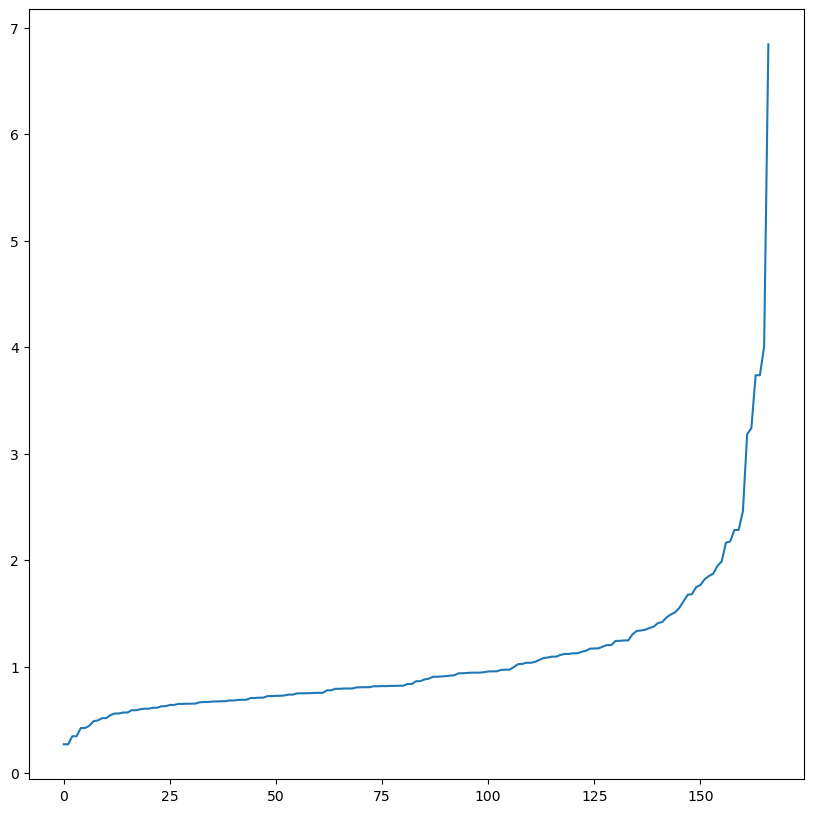

In [32]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled_country)
distances, indices = neighbors_fit.kneighbors(df_scaled_country)

distances = np.sort(distances,axis=0)
distances=distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [33]:
eps_values = np.arange(1,3,0.1)
min_samples = np.arange(3,12,1)

from itertools import product
dbscan_params = list(product(eps_values,min_samples))
no_clusters = []
sil_score = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(df_scaled_country)
    try:
        sil_score.append(silhouette_score(df_scaled_country,y_dbscan))
    except:
        sil_score.append(0)
    no_clusters.append(len(np.unique(y_dbscan)))

In [34]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params,columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_clusters

In [35]:
pivot_1 = pd.pivot_table(df_param_tunning,values='sil_score',columns='Eps',
                        index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning,values='n_clusters',columns='Eps',
                        index='Min_samples')

<AxesSubplot: xlabel='Eps', ylabel='Min_samples'>

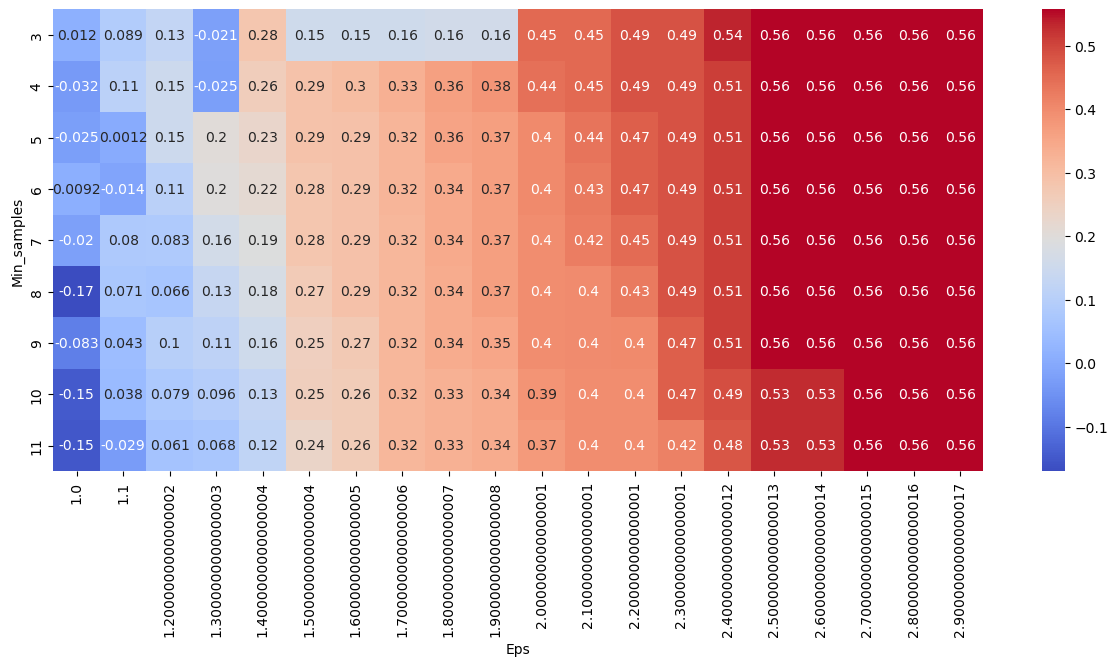

In [36]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
sns.heatmap(data=pivot_1,annot=True,annot_kws={'size':10},cmap='coolwarm',
           ax=ax)

<AxesSubplot: xlabel='Eps', ylabel='Min_samples'>

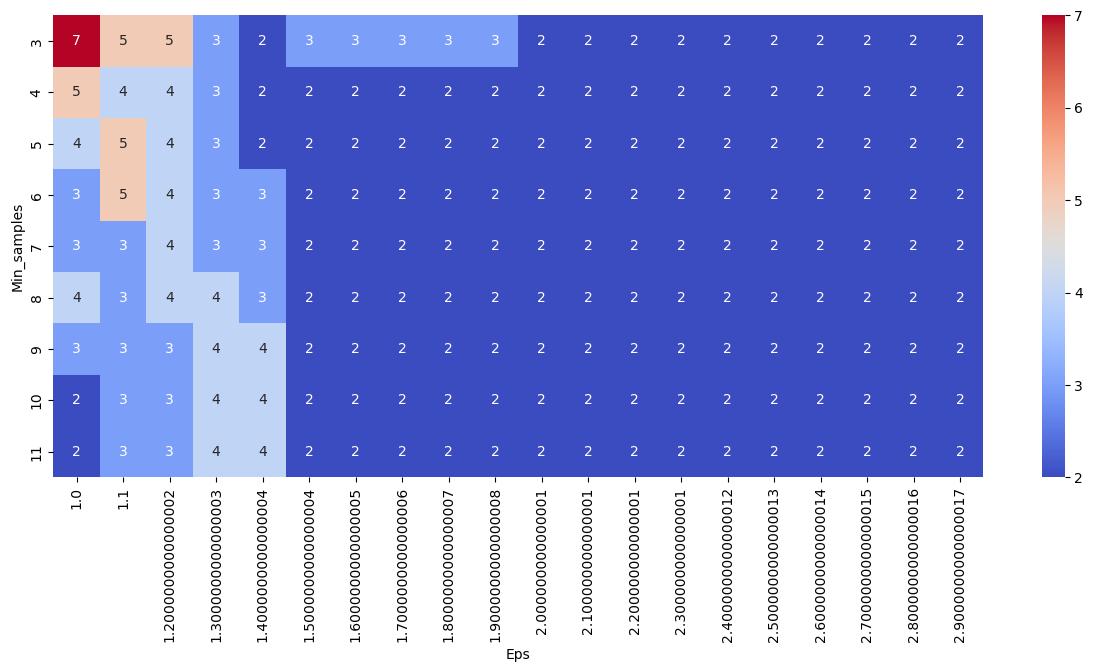

In [37]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
sns.heatmap(data=pivot_2,annot=True,annot_kws={'size':10},cmap='coolwarm',
           ax=ax)

In [38]:
dbscan_train = DBSCAN(eps=1.7,min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_scaled_country)
print(silhouette_score(df_scaled_country,y_dbscan))
df_country['dbscan_sin_pca'] = y_dbscan

0.1563549566374231


## Evaluación de resultados

In [39]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means_sin_pca', 'hc_pca', 'hc_sin_pca', 'dbscan_pca',
       'dbscan_sin_pca'],
      dtype='object')

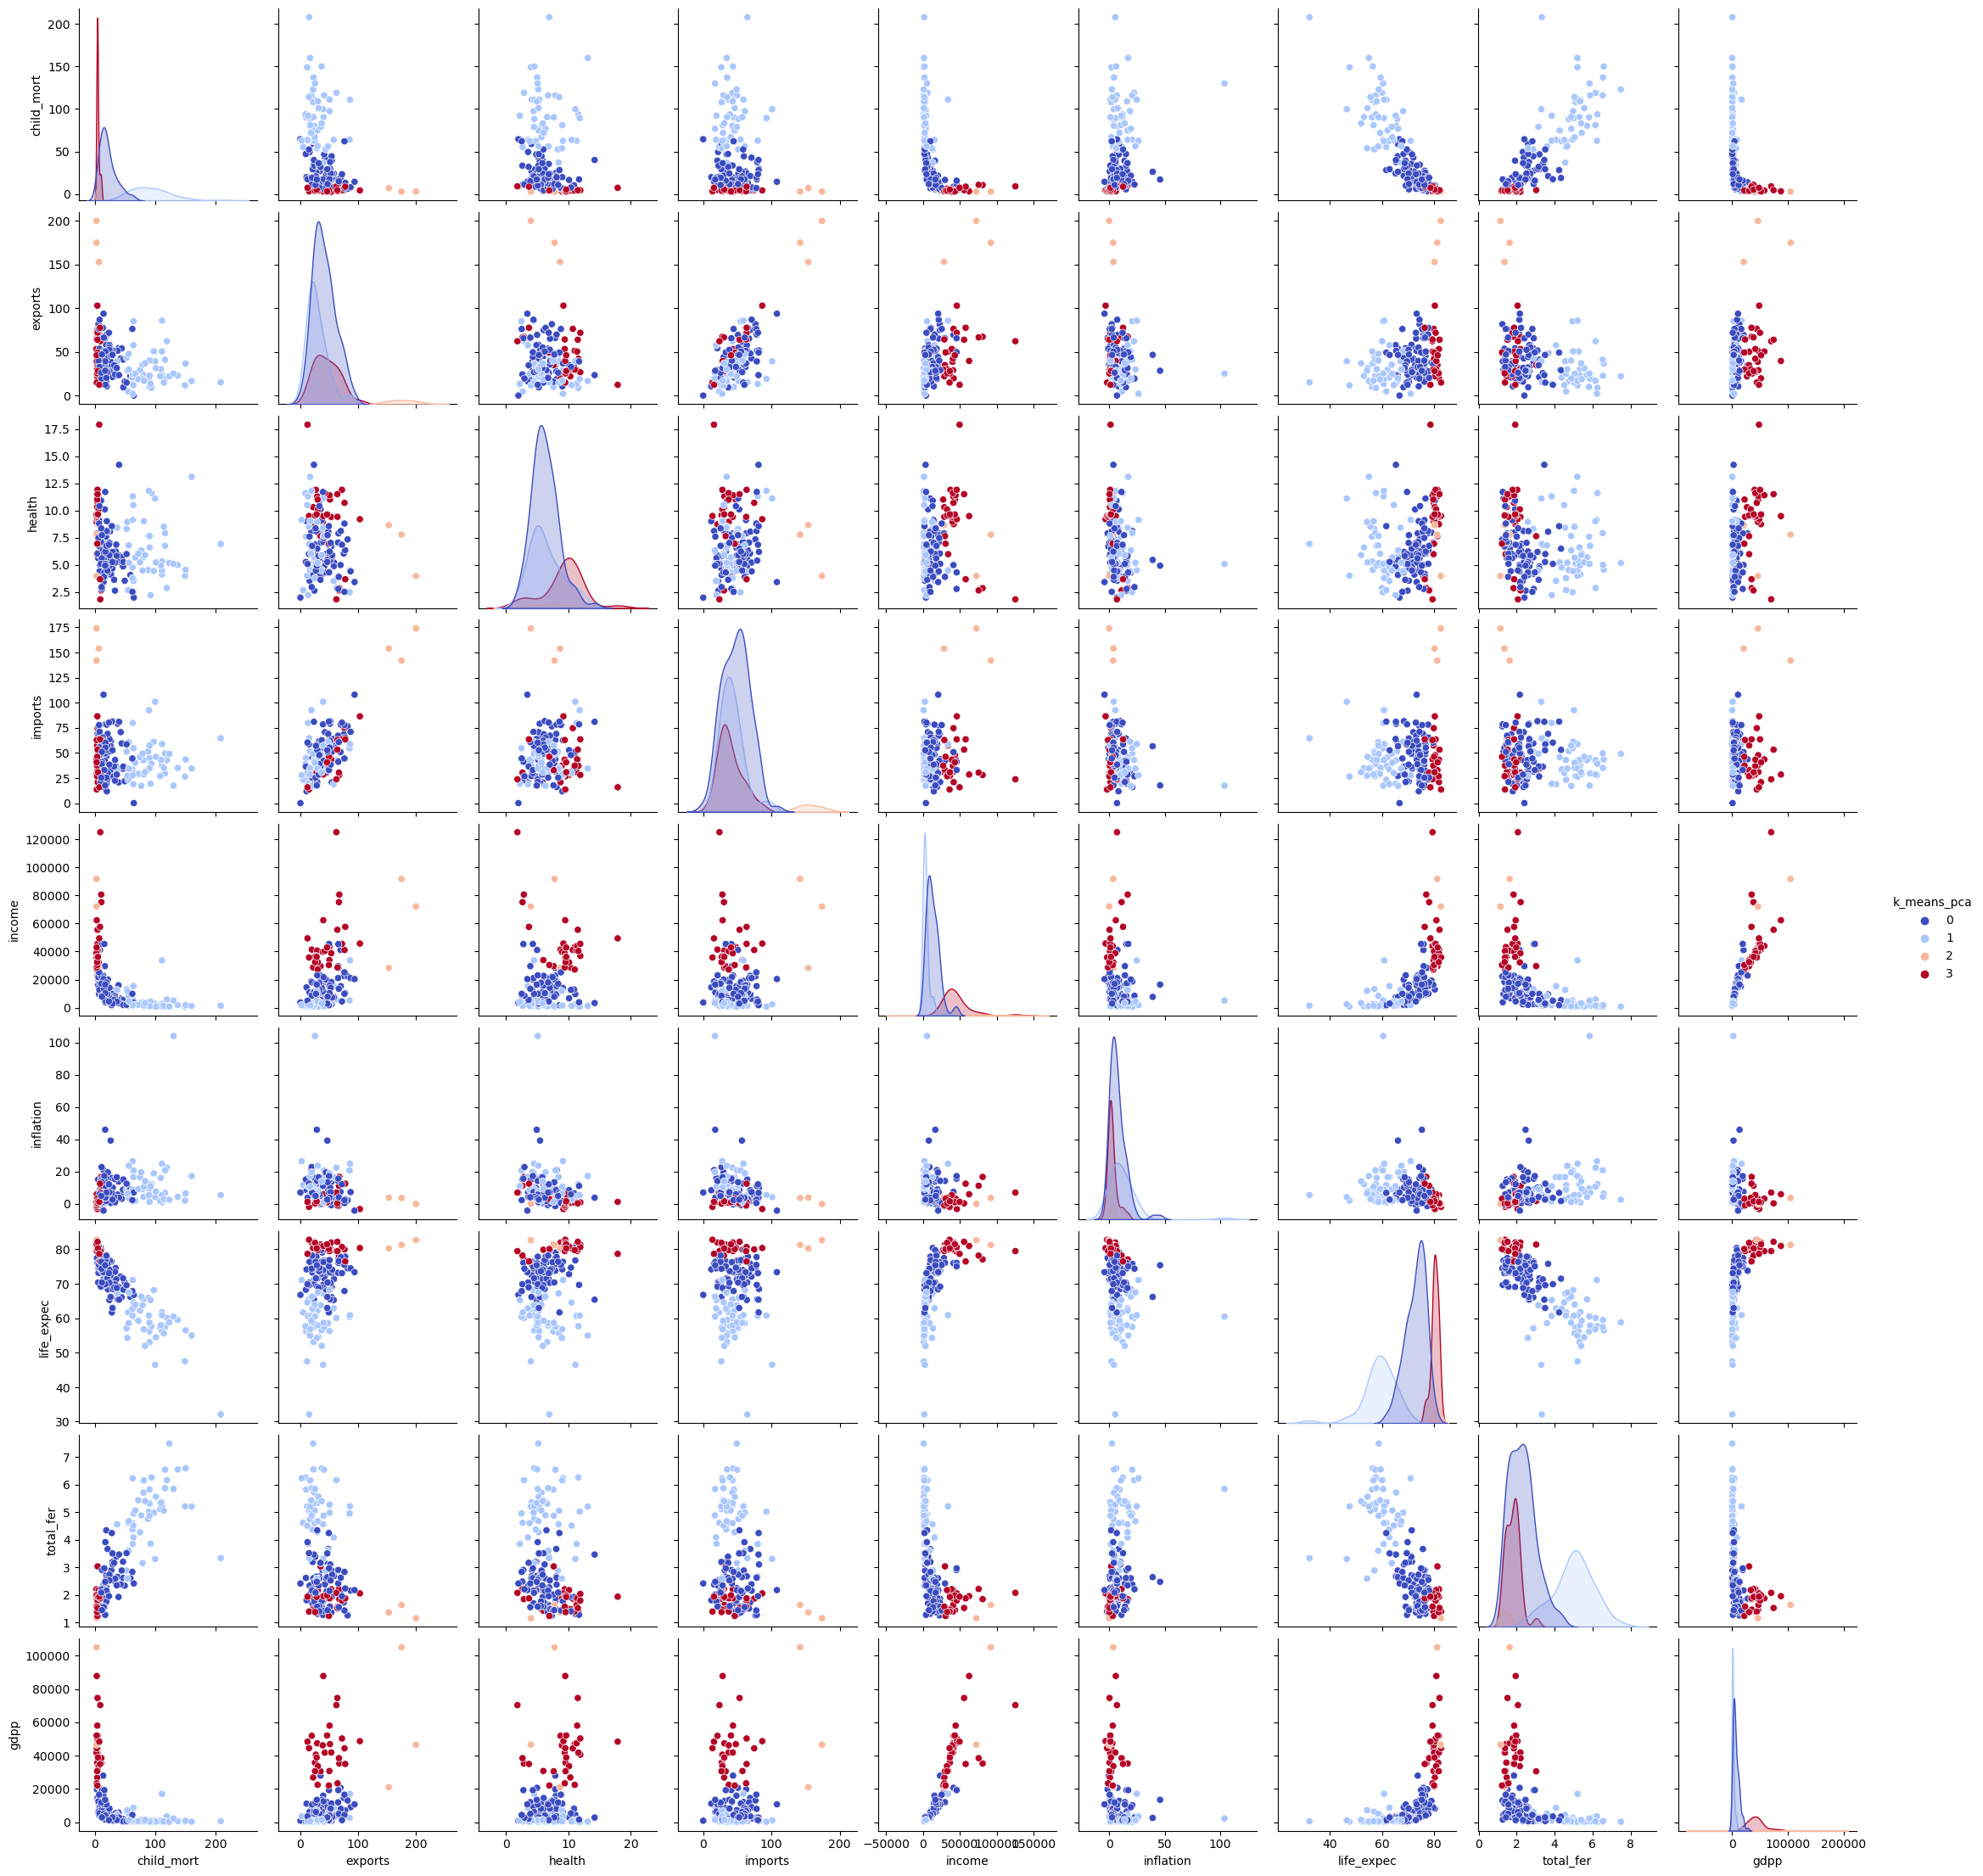

In [41]:
sns.pairplot(data=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']],hue='k_means_pca',
            palette='coolwarm')

<AxesSubplot: xlabel='child_mort', ylabel='gdpp'>

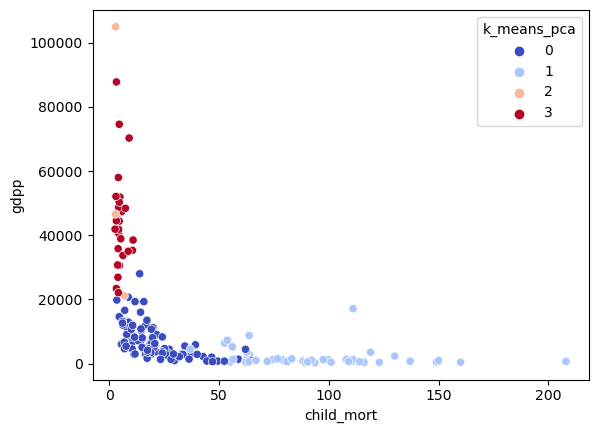

In [43]:
sns.scatterplot(data=df_country,x='child_mort',y='gdpp',hue='k_means_pca',palette='coolwarm')

In [53]:
df_country[df_country['k_means_pca']==0].sort_values(by='gdpp',ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means_sin_pca,hc_pca,hc_sin_pca,dbscan_pca,dbscan_sin_pca
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0,1,0,0,0,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0,2,0,1,0,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0,1,0,0,0,0
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300,0,2,0,1,0,0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300,0,2,0,1,0,0
134,Slovak Republic,7.0,76.3,8.79,77.8,25200,0.485,75.5,1.43,16600,0,2,0,0,0,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0,2,0,0,0,0
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600,0,2,0,0,0,0
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,0,2,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500,0,2,1,0,-1,-1
